In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#LO UNICO QUE DEBEN CAMBIAR SON LAS LONGITUDES, LAS FERCUENCIAS Y LAS INCERTIDUMBRES.

Longitudes=np.array([13.31,11.5,10.5,9.5,6.5,3.5])
frecuencias=np.array([330,307,280,258,231,202])


incertidumbre_longitud=0.02
incertidumbre_frecuencias= 5
#--------------------------------------------------------------------------------------------------------------------------------------------------
numero_de_lanzamientos=2*10**5

aleatorioslongitudes=np.empty((0,numero_de_lanzamientos))
aleatoriosfrecuencias=np.empty((0,numero_de_lanzamientos))

for i in range(len(Longitudes)):
  arra=np.log(np.random.uniform(Longitudes[i]-incertidumbre_longitud,Longitudes[i]+incertidumbre_longitud,numero_de_lanzamientos))
  aleatorioslongitudes=np.append(aleatorioslongitudes,[arra],axis=0)
for i in range(len(Longitudes)):
  arra2=np.log(np.random.uniform(frecuencias[i]-incertidumbre_frecuencias,frecuencias[i]+incertidumbre_frecuencias,numero_de_lanzamientos))
  aleatoriosfrecuencias=np.append(aleatoriosfrecuencias,[arra2],axis=0)

def obtener_b(Nlongitudes,Nfrecuencias):
  P=np.zeros((len(Nlongitudes),2))

  for i in range(len(Nlongitudes)):
    for j in range(3):
      if j==0:
        P[i,j]=1
      elif j==1:
        P[i,j]=Nlongitudes[i]

  vect=np.linalg.inv(P.T @ P) @ P.T @ Nfrecuencias
  return vect[1]


In [3]:
lista_de_b=np.zeros((numero_de_lanzamientos))
for i in range(numero_de_lanzamientos):
  datos_longitudes=aleatorioslongitudes[:,i]
  datos_frecuencias=aleatoriosfrecuencias[:,i]
  lista_de_b[i]=obtener_b(datos_longitudes,datos_frecuencias)



AttributeError: ignored

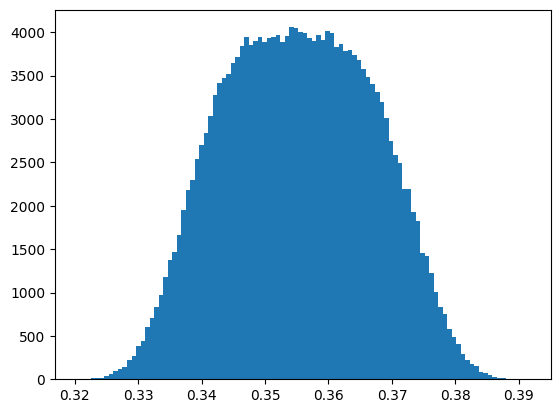

In [4]:
count, bins, ignored = plt.hist(lista_de_b, 100, normed=True)
#plt.ylabel('Frecuencia')
#plt.xlabel('Eficiencia')
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [5]:
Media=np.mean(lista_de_b)
Desviación_standar = np.std(lista_de_b)

Media, Desviación_standar

(0.3552361305441525, 0.011698104774293864)